# Pytorch tutorial

from [https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

## Part 1 Tensors

In [1]:
import torch

In [2]:
# empty matrix, whatever junk is in RAM
x = torch.empty(5, 3)
print(x)

tensor([[1.8361e+25, 1.4603e-19, 1.6795e+08],
        [4.7423e+30, 4.7393e+30, 9.5461e-01],
        [4.4377e+27, 1.7975e+19, 4.6894e+27],
        [7.9463e+08, 3.2604e-12, 1.7743e+28],
        [2.0535e-19, 5.9682e-02, 7.0374e+22]])


In [3]:
# random matrix, but did not set seed
x = torch.rand(5, 3)
print(x)

tensor([[0.9528, 0.9176, 0.1782],
        [0.3836, 0.8337, 0.1596],
        [0.5859, 0.6822, 0.7944],
        [0.4097, 0.5708, 0.1940],
        [0.4545, 0.8186, 0.9426]])


In [4]:
# zero matrix
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [5]:
# create a matrix from data
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [6]:
x = x.new_ones(5, 3, dtype=torch.double) # new_* methods take in sizes
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [7]:
# create a matrix based on another one using 'torch.like'
x = torch.randn_like(x, dtype=torch.float) # like method will reuse type, size but we force type here
print(x)

tensor([[-0.0774, -0.4816, -0.2643],
        [ 0.4655,  0.3524,  1.1779],
        [ 1.0683,  0.8921,  0.2220],
        [ 0.7016,  2.4682,  0.1829],
        [-0.1075, -0.0230, -0.1031]])


In [8]:
print(x.size())

torch.Size([5, 3])


In [9]:
# addition
y = torch.rand(5, 3)
print(x + y)

tensor([[ 0.5124, -0.0904,  0.6883],
        [ 0.7692,  1.1201,  1.8781],
        [ 1.6211,  1.4269,  0.3611],
        [ 1.6883,  2.9279,  1.1394],
        [-0.0118,  0.3476,  0.5518]])


In [10]:
# output matrix
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.5124, -0.0904,  0.6883],
        [ 0.7692,  1.1201,  1.8781],
        [ 1.6211,  1.4269,  0.3611],
        [ 1.6883,  2.9279,  1.1394],
        [-0.0118,  0.3476,  0.5518]])


In [11]:
# in-place addition
# Any operation that mutates a tensor in-place is post-fixed with an _
y.add_(x)
print(y)

tensor([[ 0.5124, -0.0904,  0.6883],
        [ 0.7692,  1.1201,  1.8781],
        [ 1.6211,  1.4269,  0.3611],
        [ 1.6883,  2.9279,  1.1394],
        [-0.0118,  0.3476,  0.5518]])


In [12]:
# resize with 'view'
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [13]:
# from 1-element tensor to number with 'item'
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.5418])
0.5417639017105103


In [14]:
# convert from torch to numpy REPRESENTATION
a = torch.ones(5)
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [15]:
# now add to 'a' in-place
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [16]:
# from numpy to torch
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [17]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

In [19]:
print(torch.cuda.is_available())

False


# Part 2 Autograd

In [34]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [35]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [36]:
print(y.grad_fn)

In [37]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [38]:
# use requires_grad_ function to change flag in-place
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [39]:
# call out.backward which is equivalent to out.backward(torch.tensor(1.)) since out contains 1 scalar

out.backward()

In [41]:
# Print gradients d(out)/dx

print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [42]:
# create vector y for vector-jacobian product

x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-1243.3035,  -631.5710,  1113.9202], grad_fn=<MulBackward0>)


In [43]:
# use 'backward' to compute vector-jacobian product

v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [44]:
# for no-grad operations

print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [45]:
# or detach

print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


# Neural nets

In [48]:
import torch.nn as nn
import torch.nn.functional as F

In [49]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [50]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [51]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


In [52]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0909,  0.0168, -0.0676,  0.0150,  0.1183,  0.0324, -0.0165, -0.0840,
         -0.0727, -0.0503]], grad_fn=<AddmmBackward>)


In [53]:
net.zero_grad()
out.backward(torch.randn(1, 10))

### Loss function

In [55]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.7946, grad_fn=<MseLossBackward>)


In [56]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [57]:
### Back propagation

net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0058,  0.0073,  0.0028, -0.0008, -0.0067, -0.0006])


# Training a classifier

In [58]:
import torchvision
import torchvision.transforms as transforms

In [59]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


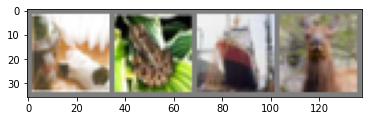

  cat  frog  ship  deer


In [60]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [61]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [62]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [63]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.172
[1,  4000] loss: 1.832
[1,  6000] loss: 1.666
[1,  8000] loss: 1.568
[1, 10000] loss: 1.533
[1, 12000] loss: 1.470
[2,  2000] loss: 1.407
[2,  4000] loss: 1.361
[2,  6000] loss: 1.351
[2,  8000] loss: 1.329
[2, 10000] loss: 1.335
[2, 12000] loss: 1.297
Finished Training


In [64]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

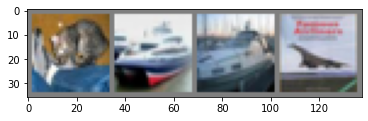

GroundTruth:    cat  ship  ship plane


In [65]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [66]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [67]:
outputs = net(images)

In [68]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [69]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [70]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 66 %
Accuracy of  bird : 50 %
Accuracy of   cat : 50 %
Accuracy of  deer : 32 %
Accuracy of   dog : 34 %
Accuracy of  frog : 70 %
Accuracy of horse : 57 %
Accuracy of  ship : 63 %
Accuracy of truck : 65 %
